In [4]:
!pip install plotnine

  Using cached plotnine-0.7.1-py3-none-any.whl (4.4 MB)
  Using cached statsmodels-0.11.1-cp37-none-win_amd64.whl (8.2 MB)
  Using cached mizani-0.7.1-py3-none-any.whl (62 kB)
  Using cached descartes-1.1.0-py3-none-any.whl (5.8 kB)
  Using cached palettable-3.3.0-py2.py3-none-any.whl (111 kB)
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.11.0
    Uninstalling statsmodels-0.11.0:
      Successfully uninstalled statsmodels-0.11.0


In [3]:
import warnings
warnings.filterwarnings('ignore')

from plotnine import *

ModuleNotFoundError: No module named 'plotnine'

In [21]:
import matplotlib.font_manager as fm
# 현재 폴더 위치 = ./
fontpath = '/content/NanumBarunpenB.ttf'
font = fm.FontProperties(fname=fontpath, size=9)

In [22]:
import numpy as np
import pandas as pd


In [23]:

performance= pd.read_excel('C:/Users/user/Downloads/01_제공데이터/2020 빅콘테스트 데이터분석분야-챔피언리그_2019년 실적데이터.xlsx')
ratings = pd.read_excel('C:/Users/user/Downloads/01_제공데이터/2020 빅콘테스트 데이터분석분야-챔피언리그_시청률 데이터.xlsx',)

In [24]:
performance.columns=['방송일시', '노출(분)', '마더코드', '상품코드', '상품명', '상품군', '판매단가', '취급액']

In [25]:
performance = performance.drop([0])

In [33]:
performance.head(10)

,방송일시,노출(분),마더코드,상품코드,상품명,상품군,판매단가,취급액
1,2019-01-01 06:00:00,20,100346,201072,테이트 남성 셀린니트3종,의류,39900,2099000
2,2019-01-01 06:00:00,0,100346,201079,테이트 여성 셀린니트3종,의류,39900,4371000
3,2019-01-01 06:20:00,20,100346,201072,테이트 남성 셀린니트3종,의류,39900,3262000
4,2019-01-01 06:20:00,0,100346,201079,테이트 여성 셀린니트3종,의류,39900,6955000
5,2019-01-01 06:40:00,20,100346,201072,테이트 남성 셀린니트3종,의류,39900,6672000
6,2019-01-01 06:40:00,0,100346,201079,테이트 여성 셀린니트3종,의류,39900,9337000
7,2019-01-01 07:00:00,20,100305,200974,오모떼 레이스 파운데이션 브라,속옷,59000,6819000
8,2019-01-01 07:20:00,20,100305,200974,오모떼 레이스 파운데이션 브라,속옷,59000,15689000
9,2019-01-01 07:40:00,20,100305,200974,오모떼 레이스 파운데이션 브라,속옷,59000,25370000
10,2019-01-01 08:00:00,20,100808,202377,CERINI by PAT 남성 소프트 기모 릴렉스팬츠,의류,59900,16133000


In [26]:
#노출분, 취급액 null값 존재
performance.isnull().any()

방송일시     False
노출(분)     True
마더코드     False
상품코드     False
상품명      False
상품군      False
판매단가     False
취급액       True
dtype: bool

In [27]:
#-*-coding:utf-8-*-
performance = performance.fillna(0)

In [28]:
performance = performance.astype({'노출(분)' : 'int',
                                  '마더코드' : 'int',
                                  '상품코드' : 'int',
                                  '판매단가' : 'int',
                                  '취급액' : 'int'})

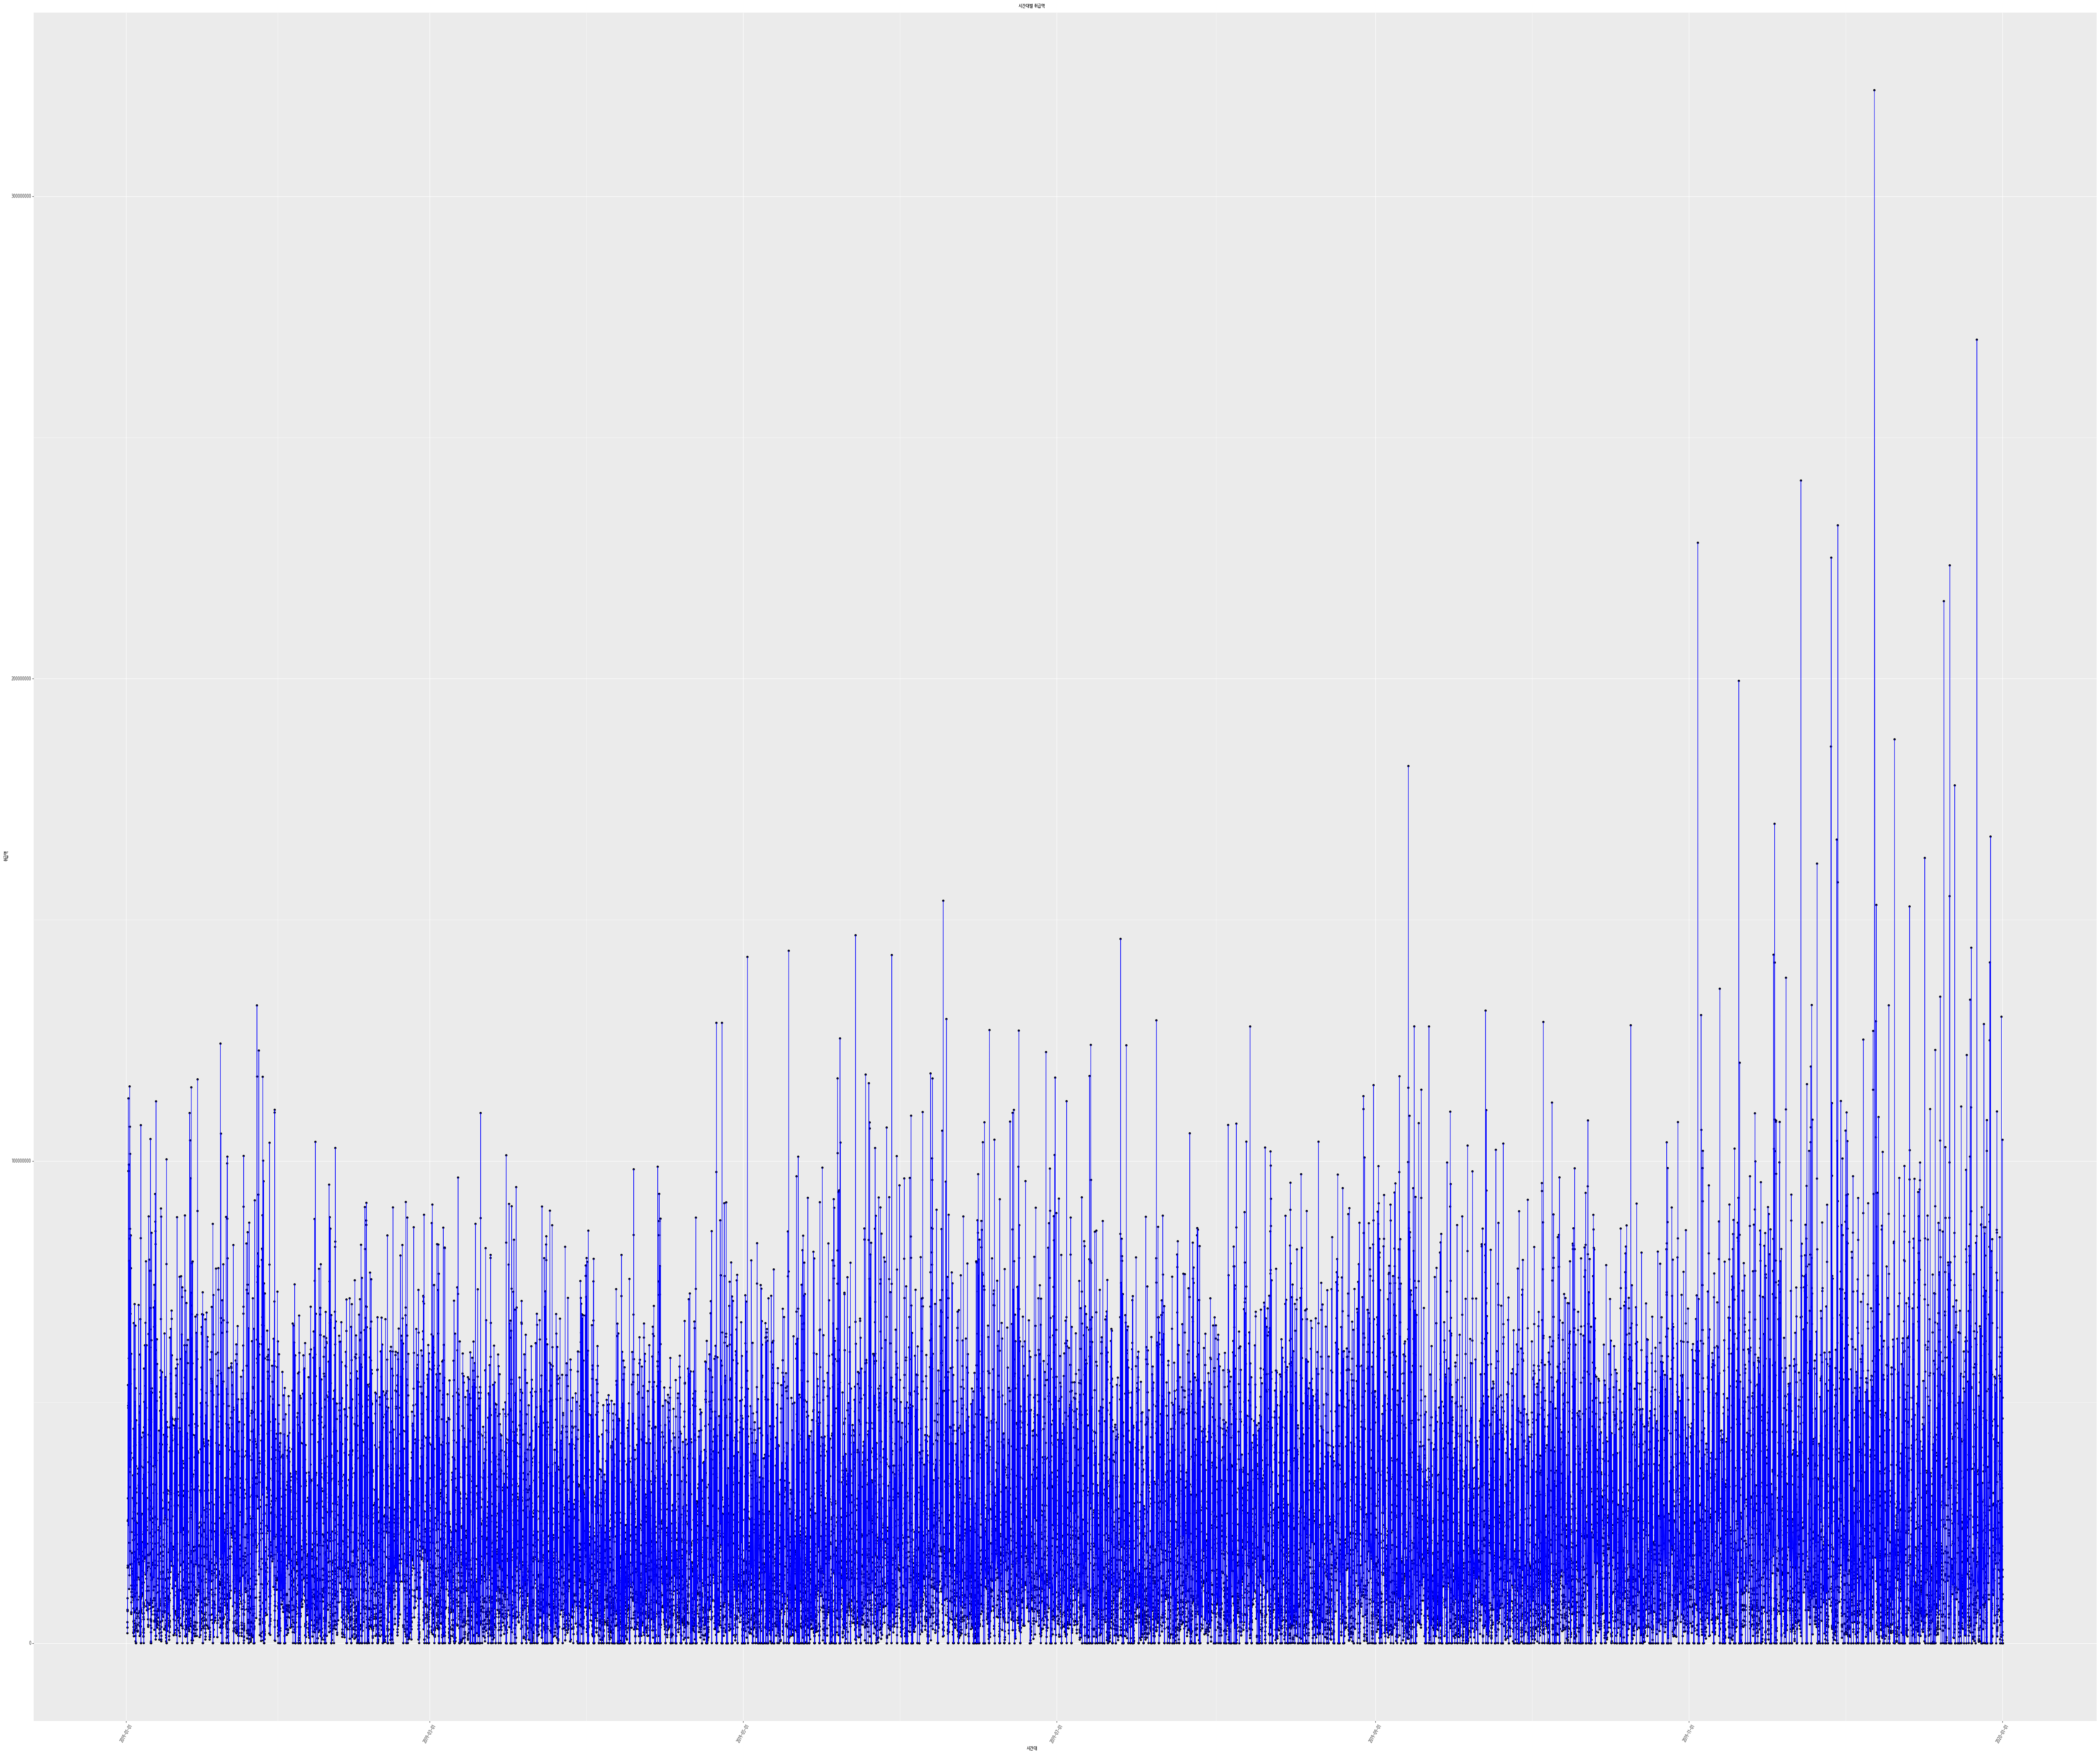

<ggplot: (-9223363305355621197)>

In [246]:
(ggplot(performance)
+aes(x='방송일시', y='취급액')
+geom_point()
+geom_line(color='blue')
+labs(x='시간대', y='취급액', title='시간대별 취급액')
+theme(text=element_text(fontproperties=font),
       figure_size=(96,84), axis_text_x=element_text(rotation=60))
)

##11월 달 이후의 취급액이 대체로 높은 편

In [29]:
group_ = performance.groupby('상품군').sum()

In [30]:
(ggplot(performance)
+aes(x='상품군', y='취급액')
+geom_point()
+geom_line(color='orange')
+labs(x='상품군', y='취급액', title='상품군별 취급액')
+theme(text=element_text(fontproperties=font),
       figure_size=(12,6), axis_text_x=element_text(rotation=60))
)

NameError: name 'ggplot' is not defined

In [259]:
group_name = performance.groupby('상품명').sum()

In [265]:
sorted_groupName = group_name.sort_values(by='취급액', ascending=False)

In [274]:
sorted_groupName.head(10)

,노출(분),마더코드,상품코드,판매단가,취급액
상품명,,,,,
한일 대용량 스텐 분쇄믹서기,8020,40202255,80548187,44029800,18167996000
안동간고등어 20팩,6360,31880454,63874752,9826200,14391949000
AAB의 소곱창전골 800g x 8팩,5040,25202520,50403528,14086800,11923972000
일시불 LG전자 매직스페이스 냉장고,6180,30847740,61771093,424272000,10904495000
에코라믹 통주물 스톤 냄비세트,4620,23120328,46254549,14067900,9504131000
국내산 손질갑오징어 8팩,3196,16051520,32236640,7984000,9417609000
무이자 LG전자 매직스페이스 냉장고,0,30847740,61750457,467392000,9279239000
비버리힐스폴로클럽 남성기초세트(골드+콜라겐),3037,15211248,30475496,6049600,8682518000
일시불 LG 통돌이 세탁기,5520,27541250,55146573,120725000,8119532000


In [270]:
sortedBy_price = performance.sort_values(by='판매단가', ascending=False)

In [283]:
sortedBy_price

,방송일시,노출(분),마더코드,상품코드,상품명,상품군,판매단가,취급액
30972,2019-10-19 08:30:00,0,100788,202330,[루이띠에] 순금 70g 골드바,잡화,7930000,50000
31499,2019-10-24 08:30:00,0,100788,202330,[루이띠에] 순금 70g 골드바,잡화,7930000,50000
30965,2019-10-19 08:00:00,0,100788,202330,[루이띠에] 순금 70g 골드바,잡화,7930000,50000
30162,2019-10-11 08:30:00,0,100788,202330,[루이띠에] 순금 70g 골드바,잡화,7930000,36072000
30155,2019-10-11 08:00:00,0,100788,202330,[루이띠에] 순금 70g 골드바,잡화,7930000,50000
...,...,...,...,...,...,...,...,...
17562,2019-06-14 19:00:00,30,100324,201097,온라인투어 미동부/캐나다 (190608),무형,0,0
17563,2019-06-14 19:30:00,30,100324,201097,온라인투어 미동부/캐나다 (190608),무형,0,0
17602,2019-06-14 23:00:00,20,100324,201110,온라인투어 청도(190615),무형,0,0
17603,2019-06-14 23:20:00,20,100324,201110,온라인투어 청도(190615),무형,0,0


In [284]:
sortedBy_price.loc[(sortedBy_price['상품군'])]

,방송일시,노출(분),마더코드,상품코드,상품명,상품군,판매단가,취급액
23813,2019-08-12 13:50:00,10,100352,201144,마르엘라로사티 휘메일 풀스킨 하이넥 밍크코트 1종,의류,2490000,40704000
23810,2019-08-12 13:20:00,10,100352,201144,마르엘라로사티 휘메일 풀스킨 하이넥 밍크코트 1종,의류,2490000,40491000
24359,2019-08-17 09:30:00,10,100352,201144,마르엘라로사티 휘메일 풀스킨 하이넥 밍크코트 1종,의류,2490000,16246000
24803,2019-08-21 10:10:00,10,100352,201144,마르엘라로사티 휘메일 풀스킨 하이넥 밍크코트 1종,의류,2490000,7773000
25876,2019-09-01 20:20:00,10,100352,201144,마르엘라로사티 휘메일 풀스킨 하이넥 밍크코트 1종,의류,2490000,19871000
...,...,...,...,...,...,...,...,...
25933,2019-09-02 09:00:00,20,100452,201396,NNF SS트레이닝 세트(8월),의류,29000,27069000
17220,2019-06-11 11:40:00,20,100818,202412,보코 에스닉 앙상블,의류,29000,39054000
26230,2019-09-05 09:40:00,20,100458,201411,크리스티나앤코 가디건세트,의류,29000,49404000
26229,2019-09-05 09:20:00,20,100458,201411,크리스티나앤코 가디건세트,의류,29000,43081000


In [294]:
sortedBy_price.loc[(sortedBy_price['상품군']=='농수축')]

,방송일시,노출(분),마더코드,상품코드,상품명,상품군,판매단가,취급액
37679,2019-12-24 23:00:00,20,100050,200133,자이언트킹랍스터 (점보1미+골든 2미+ 크래커),농수축,109900,79018000
37677,2019-12-24 22:20:00,20,100050,200133,자이언트킹랍스터 (점보1미+골든 2미+ 크래커),농수축,109900,18796000
37678,2019-12-24 22:40:00,20,100050,200133,자이언트킹랍스터 (점보1미+골든 2미+ 크래커),농수축,109900,60715000
37277,2019-12-20 21:20:00,20,100050,200133,자이언트킹랍스터 (점보1미+골든 2미+ 크래커),농수축,109900,38157000
37279,2019-12-20 22:00:00,20,100050,200133,자이언트킹랍스터 (점보1미+골든 2미+ 크래커),농수축,109900,88195000
...,...,...,...,...,...,...,...,...
36634,2019-12-14 17:00:00,20,100548,201634,완도꼬마활전복 1.3kg,농수축,29900,81969000
36633,2019-12-14 16:40:00,20,100548,201634,완도꼬마활전복 1.3kg,농수축,29900,83889000
36062,2019-12-09 09:40:00,20,100637,201955,영산포숙성홍어회7팩,농수축,29900,46826000
30593,2019-10-15 18:40:00,20,100337,201050,거창특등급사과 5kg+5kg,농수축,28900,30661000


In [311]:
after11 = performance[32218:]

In [316]:
after11.groupby('상품군').mean()

,노출(분),마더코드,상품코드,판매단가,취급액
상품군,,,,,
가구,4.421538,100301.052308,200985.156923,1.092671e+06,1.098146e+07
가전,8.137432,100213.104882,200660.396022,1.602859e+06,2.951255e+07
건강기능,16.363057,100530.675159,201609.082803,7.785987e+04,2.774061e+07
농수축,18.412121,100378.927273,201194.936364,4.434091e+04,4.519495e+07
무형,23.367284,100492.527778,201610.382716,0.000000e+00,0.000000e+00
생활용품,7.819761,100350.891422,201113.650380,1.837432e+05,1.668420e+07
속옷,11.825603,100436.888683,201359.925788,7.433414e+04,2.433408e+07
의류,14.463884,100341.385233,201059.378812,1.382416e+05,3.064611e+07
이미용,19.522193,100381.258486,201179.947781,5.478956e+04,4.868042e+07


In [315]:
before11 = performance[:32218]
before11.groupby('상품군').mean()

,노출(분),마더코드,상품코드,판매단가,취급액
상품군,,,,,
가구,4.531236,100319.769332,201028.187418,8.080948e+05,1.117421e+07
가전,4.971313,100242.466757,200757.409382,1.634044e+06,1.363589e+07
건강기능,16.693523,100439.454976,201341.731438,8.467962e+04,2.487922e+07
농수축,18.731390,100436.773263,201365.795285,4.684507e+04,4.221885e+07
무형,22.606852,100427.184339,201503.970636,0.000000e+00,0.000000e+00
생활용품,11.464213,100416.669734,201281.786299,1.877303e+05,1.854869e+07
속옷,15.400592,100464.202367,201441.228994,7.856287e+04,2.635528e+07
의류,14.578423,100377.027441,201211.670433,1.583801e+05,2.332824e+07
이미용,19.336226,100290.937093,200970.950108,4.946833e+04,3.327334e+07


In [317]:
performance.groupby('상품군').mean()

,노출(분),마더코드,상품코드,판매단가,취급액
상품군,,,,,
가구,4.517598,100317.442234,201022.837414,8.434763e+05,1.115025e+07
가전,5.241550,100239.960642,200749.129032,1.631382e+06,1.499100e+07
건강기능,16.627848,100457.583544,201394.863291,8.332430e+04,2.544787e+07
농수축,18.677137,100426.943615,201336.761586,4.641954e+04,4.272457e+07
무형,22.869797,100449.779082,201540.766275,0.000000e+00,0.000000e+00
생활용품,10.297532,100395.612444,201227.961766,1.864539e+05,1.795182e+07
속옷,14.908905,100460.445777,201430.046951,7.798127e+04,2.607730e+07
의류,14.561982,100371.911060,201189.809217,1.554892e+05,2.437871e+07
이미용,19.390805,100317.445211,201032.288123,5.103004e+04,3.779511e+07


방송일시, 상품명, 상품군 인코딩

In [220]:
del performance['방송일시']

In [221]:
performance['노출(분)'][38309]

17

In [ ]:


listing=[]

for i in range(1,len(performance)+1) : 
  if i==1 : 
    listing.append(performance['노출(분)'][i])

  else : 
    listing.append(listing[i-2]+performance['노출(분)'][i])

  # listing = list(map(int, listing))


performance['방송일시'] = listing

In [223]:
performance

,노출(분),마더코드,상품코드,상품명,상품군,판매단가,취급액,방송일시
1,20,100346,201072,테이트 남성 셀린니트3종,의류,39900,2099000,20
2,0,100346,201079,테이트 여성 셀린니트3종,의류,39900,4371000,20
3,20,100346,201072,테이트 남성 셀린니트3종,의류,39900,3262000,40
4,0,100346,201079,테이트 여성 셀린니트3종,의류,39900,6955000,40
5,20,100346,201072,테이트 남성 셀린니트3종,의류,39900,6672000,60
...,...,...,...,...,...,...,...,...
38305,20,100073,200196,삼성화재 행복한파트너 주택화재보험(1912),무형,0,0,434061
38306,20,100073,200196,삼성화재 행복한파트너 주택화재보험(1912),무형,0,0,434081
38307,20,100073,200196,삼성화재 행복한파트너 주택화재보험(1912),무형,0,0,434101
38308,20,100490,201478,더케이 예다함 상조서비스(티포트),무형,0,0,434121


In [224]:
performance


,노출(분),마더코드,상품코드,상품명,상품군,판매단가,취급액,방송일시
1,20,100346,201072,테이트 남성 셀린니트3종,의류,39900,2099000,20
2,0,100346,201079,테이트 여성 셀린니트3종,의류,39900,4371000,20
3,20,100346,201072,테이트 남성 셀린니트3종,의류,39900,3262000,40
4,0,100346,201079,테이트 여성 셀린니트3종,의류,39900,6955000,40
5,20,100346,201072,테이트 남성 셀린니트3종,의류,39900,6672000,60
...,...,...,...,...,...,...,...,...
38305,20,100073,200196,삼성화재 행복한파트너 주택화재보험(1912),무형,0,0,434061
38306,20,100073,200196,삼성화재 행복한파트너 주택화재보험(1912),무형,0,0,434081
38307,20,100073,200196,삼성화재 행복한파트너 주택화재보험(1912),무형,0,0,434101
38308,20,100490,201478,더케이 예다함 상조서비스(티포트),무형,0,0,434121


In [225]:
from sklearn.preprocessing import LabelEncoder
items = performance['상품명']
encoder = LabelEncoder()
encoder.fit(items)

performance['상품명']=encoder.transform(items)
print('인코딩 변환값:',labels)

인코딩 변환값: [1592 1598 1137 ... 1514  959  487]


In [226]:
from sklearn.preprocessing import LabelEncoder
items = performance['상품군']
encoder = LabelEncoder()
encoder.fit(items)

performance['상품군']=encoder.transform(items)
print('인코딩 변환값:',labels)

인코딩 변환값: [1592 1598 1137 ... 1514  959  487]


In [227]:
performance

,노출(분),마더코드,상품코드,상품명,상품군,판매단가,취급액,방송일시
1,20,100346,201072,1592,7,39900,2099000,20
2,0,100346,201079,1598,7,39900,4371000,20
3,20,100346,201072,1592,7,39900,3262000,40
4,0,100346,201079,1598,7,39900,6955000,40
5,20,100346,201072,1592,7,39900,6672000,60
...,...,...,...,...,...,...,...,...
38305,20,100073,200196,959,4,0,0,434061
38306,20,100073,200196,959,4,0,0,434081
38307,20,100073,200196,959,4,0,0,434101
38308,20,100490,201478,487,4,0,0,434121


In [228]:
num_performance = performance.to_numpy

In [229]:
#############실적데이터 전처리################

num_performance

<bound method DataFrame.to_numpy of        노출(분)    마더코드    상품코드   상품명  상품군   판매단가      취급액    방송일시
1         20  100346  201072  1592    7  39900  2099000      20
2          0  100346  201079  1598    7  39900  4371000      20
3         20  100346  201072  1592    7  39900  3262000      40
4          0  100346  201079  1598    7  39900  6955000      40
5         20  100346  201072  1592    7  39900  6672000      60
...      ...     ...     ...   ...  ...    ...      ...     ...
38305     20  100073  200196   959    4      0        0  434061
38306     20  100073  200196   959    4      0        0  434081
38307     20  100073  200196   959    4      0        0  434101
38308     20  100490  201478   487    4      0        0  434121
38309     17  100490  201478   487    4      0        0  434138

[38309 rows x 8 columns]>

In [ ]:
'''ratings:
시청률 1분 단위로 추세 보기
시청률 20분 단위로 추세 보기'''

'''performing:
방송 1분 단위로 나누기
방송 20분 단위..( 원본 )
'''

'''
상품군 중 상품명 자연어 처리 wordcloud: 
ex) 니트/ 자켓 등 더 자세한 분류로 나누기
'''

'''
월화수목금 별:
datetime library: 월/화/수/목/금/토/일 분류: 매출액 비교.

'''


'''
노출 대비 매출액

'''


In [ ]:
# side:텍스트 마이닝

'''

'''


In [96]:
ratings.head(10)

,"NS SHOP+_일자별, 시간대별 시청률 (2019년)",Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 357,Unnamed: 358,Unnamed: 359,Unnamed: 360,Unnamed: 361,Unnamed: 362,Unnamed: 363,Unnamed: 364,Unnamed: 365,Unnamed: 366
0,시간대,2019-01-01,2019-01-02,2019-01-03,2019-01-04,2019-01-05,2019-01-06,2019-01-07,2019-01-08,2019-01-09,...,2019-12-23,2019-12-24,2019-12-25,2019-12-26,2019-12-27,2019-12-28,2019-12-29,2019-12-30,2019-12-31,2019-01-01 to 2019-12-31
1,02:00,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.003
2,02:01,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0.012,0.003
3,02:02,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.004
4,02:03,0,0,0.014,0,0,0,0,0,0,...,0,0,0.017,0,0,0,0,0,0,0.004
5,02:04,0,0,0,0,0,0,0,0,0,...,0,0,0.017,0,0,0,0,0,0,0.004
6,02:05,0,0,0,0,0,0,0,0,0,...,0,0,0.017,0,0,0,0,0,0,0.004
7,02:06,0,0,0,0,0,0,0,0,0,...,0,0,0.017,0,0,0,0,0,0,0.003
8,02:07,0,0,0,0,0,0,0,0,0,...,0,0,0.017,0,0,0,0,0,0,0.003
9,02:08,0,0,0,0,0,0,0,0,0,...,0,0,0.017,0,0,0,0,0,0,0.003


In [104]:
#temp2=ratings.groupby('시간대').sum()
#group_name = performance.groupby('상품명').sum()
tem=ratings
tem = tem.rename(columns=tem.iloc[0])

tem.head(10)

,시간대,2019-01-01,2019-01-02,2019-01-03,2019-01-04,2019-01-05,2019-01-06,2019-01-07,2019-01-08,2019-01-09,...,2019-12-23,2019-12-24,2019-12-25,2019-12-26,2019-12-27,2019-12-28,2019-12-29,2019-12-30,2019-12-31,2019-01-01 to 2019-12-31
0,시간대,2019-01-01,2019-01-02,2019-01-03,2019-01-04,2019-01-05,2019-01-06,2019-01-07,2019-01-08,2019-01-09,...,2019-12-23,2019-12-24,2019-12-25,2019-12-26,2019-12-27,2019-12-28,2019-12-29,2019-12-30,2019-12-31,2019-01-01 to 2019-12-31
1,02:00,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.003
2,02:01,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0.012,0.003
3,02:02,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.004
4,02:03,0,0,0.014,0,0,0,0,0,0,...,0,0,0.017,0,0,0,0,0,0,0.004
5,02:04,0,0,0,0,0,0,0,0,0,...,0,0,0.017,0,0,0,0,0,0,0.004
6,02:05,0,0,0,0,0,0,0,0,0,...,0,0,0.017,0,0,0,0,0,0,0.004
7,02:06,0,0,0,0,0,0,0,0,0,...,0,0,0.017,0,0,0,0,0,0,0.003
8,02:07,0,0,0,0,0,0,0,0,0,...,0,0,0.017,0,0,0,0,0,0,0.003
9,02:08,0,0,0,0,0,0,0,0,0,...,0,0,0.017,0,0,0,0,0,0,0.003


In [111]:
#시청률 데이터셋을 performance 데이터셋과 유사하게 변환
'''
날짜             | 시청률
2019-01-01 02:00 |  0
...
'''

temp=ratings
temp=temp.T
temp = temp.rename(columns=temp.iloc[0])
temp = temp.drop(temp.index[0])

temp.head(10)

,시간대,02:00,02:01,02:02,02:03,02:04,02:05,02:06,02:07,02:08,...,01:51,01:52,01:53,01:54,01:55,01:56,01:57,01:58,01:59,월화수목금토일02:00-01:59
Unnamed: 1,2019-01-01,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.004
Unnamed: 2,2019-01-02,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.006
Unnamed: 3,2019-01-03,0,0,0,0.014,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.002
Unnamed: 4,2019-01-04,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.003
Unnamed: 5,2019-01-05,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0.027,0,0,0,0.002
Unnamed: 6,2019-01-06,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.003
Unnamed: 7,2019-01-07,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.003
Unnamed: 8,2019-01-08,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.002
Unnamed: 9,2019-01-09,0,0,0,0,0,0,0,0,0,...,0.004,0.004,0.004,0.004,0.004,0,0.004,0.004,0.004,0.003
Unnamed: 10,2019-01-10,0,0.005,0.005,0.005,0.005,0.005,0.005,0.005,0,...,0,0,0,0,0,0,0,0,0,0.002


In [36]:
# by day
from datetime import *
def find_day(str):
    daylist = ['월', '화', '수', '목', '금', '토', '일']
    new=datetime.fromisoformat(str)
    return daylist[datetime.date(new).weekday()]
find_day('2020-08-07 00:30:00')


'금'

In [42]:
performance

,방송일시,노출(분),마더코드,상품코드,상품명,상품군,판매단가,취급액,요일
1,2019-01-01 06:00:00,20,100346,201072,테이트 남성 셀린니트3종,의류,39900,2099000,월
2,2019-01-01 06:00:00,0,100346,201079,테이트 여성 셀린니트3종,의류,39900,4371000,월
3,2019-01-01 06:20:00,20,100346,201072,테이트 남성 셀린니트3종,의류,39900,3262000,월
4,2019-01-01 06:20:00,0,100346,201079,테이트 여성 셀린니트3종,의류,39900,6955000,월
5,2019-01-01 06:40:00,20,100346,201072,테이트 남성 셀린니트3종,의류,39900,6672000,월
...,...,...,...,...,...,...,...,...,...
38305,2020-01-01 00:20:00,20,100073,200196,삼성화재 행복한파트너 주택화재보험(1912),무형,0,0,월
38306,2020-01-01 00:40:00,20,100073,200196,삼성화재 행복한파트너 주택화재보험(1912),무형,0,0,월
38307,2020-01-01 01:00:00,20,100073,200196,삼성화재 행복한파트너 주택화재보험(1912),무형,0,0,월
38308,2020-01-01 01:20:00,20,100490,201478,더케이 예다함 상조서비스(티포트),무형,0,0,월


In [70]:
performance['요일']='월'


for i in performance.index:
    day= performance['방송일시'][i]
    #print(day)
    day=str(day)
    #print(day)
    day=find_day(day)
    #print(day)
    performance['요일'][i]=day

Mon=performance[performance['요일']=='월']
Tue=performance[performance['요일']=='화']
Wed=performance[performance['요일']=='수']
Thu=performance[performance['요일']=='목']
Fri=performance[performance['요일']=='금']
Sat=performance[performance['요일']=='토']
Sun=performance[performance['요일']=='일']

Byday=performance.groupby(performance['요일'])['취급액'].sum()


요일
금    1.084052e+11
목    1.117497e+11
수    1.132589e+11
월    1.105840e+11
일    1.347887e+11
토    1.248999e+11
화    1.137535e+11
Name: 취급액, dtype: float64

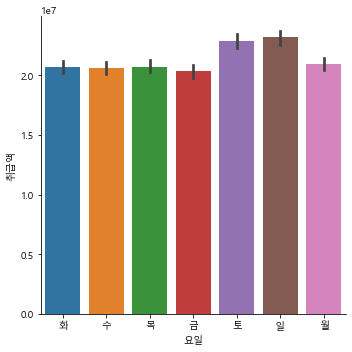

In [87]:
font_name = plt.font_manager.FontProperties(fname='C:/Windows/Fonts/malgun.ttf').get_name()
plt.rc('font', family=font_name)
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns
sns.factorplot(x='요일', y='취급액',kind='bar',data=performance)



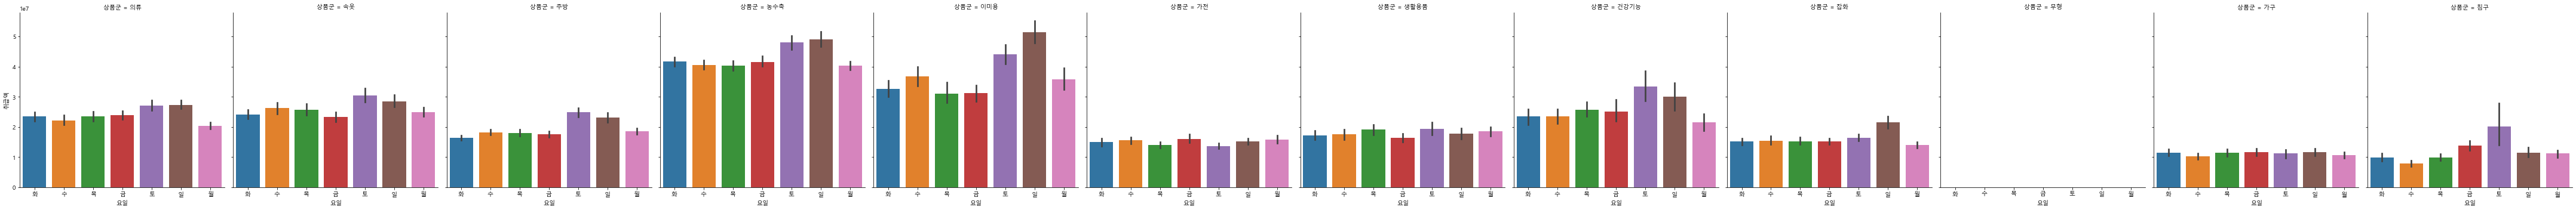

In [95]:

sns.factorplot(x='요일', y='취급액',col='상품군',kind='bar',data=performance)

In [32]:
'''
외부 데이터:
서울시 유동인구 데이터:
유동인구와 홈쇼핑 관계:
- 코로나 반영 - 6월달에 유동인구 예전으로 돌아가나?

날씨와 홈쇼핑 관계
: 미세먼지 api 실패

'''
#유동인구 일자별/ 1시간 당 시청률?: 상관 분석/ 1시간당 매출  
floating=pd.read_csv("C:/Users/user/Downloads/Floating_Population_1905.csv")
floating.head(10)

,일자,시간(1시간단위),연령대(10세단위),성별,시,군구,유동인구수
0,20190501,0,20,남성,서울,금천구,17770
1,20190501,0,20,남성,서울,서대문구,27170
2,20190501,0,20,여성,서울,강동구,28460
3,20190501,0,20,여성,서울,금천구,16240
4,20190501,0,30,남성,서울,동대문구,28510
5,20190501,0,30,남성,서울,중구,15820
6,20190501,0,30,여성,서울,노원구,38700
7,20190501,0,40,남성,서울,도봉구,25300
8,20190501,0,40,여성,서울,도봉구,28010
9,20190501,0,40,여성,서울,서대문구,24600
